In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
#scikit learn PCA standard scaler

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')#to remove the warnings

In [3]:
df = pd.read_csv('winequality-red.csv')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.loc[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


<AxesSubplot:>

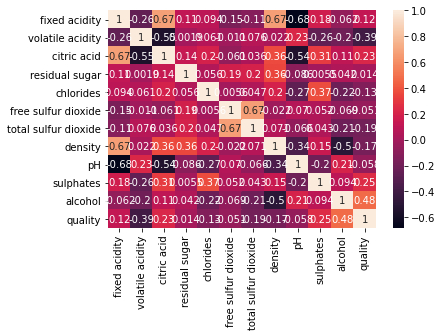

In [11]:
sns.heatmap(df.corr(),annot= True)

In [15]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled= pd.DataFrame(df_scaled,columns=df.columns)
df_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


In [16]:
pca = PCA(svd_solver='randomized',random_state=123)
pca.fit(df_scaled)

PCA(random_state=123, svd_solver='randomized')

In [17]:
pca.components_

array([[ 0.48788336, -0.26512898,  0.47333547,  0.13915442,  0.19742679,
        -0.04588071,  0.00406675,  0.37030119, -0.43272085,  0.25453535,
        -0.07317678,  0.11248878],
       [-0.00417321,  0.33896786, -0.1373581 ,  0.16773634,  0.18978819,
         0.25948314,  0.36397137,  0.33078079, -0.06544015, -0.10933362,
        -0.50270865, -0.47316621],
       [-0.16482854, -0.22708884,  0.10022856,  0.24362014, -0.02660785,
         0.61611132,  0.54073214, -0.16872267,  0.06977056,  0.21291324,
         0.22497138,  0.22336929],
       [-0.23109808,  0.04185824, -0.0567358 , -0.38303758,  0.65477782,
        -0.03371148, -0.02845973, -0.20069341, -0.00546618,  0.56050237,
        -0.09170143, -0.03666923],
       [-0.07877938,  0.29937933, -0.12014871,  0.70936319,  0.26623723,
        -0.15941286, -0.21845284,  0.20879298,  0.25764682,  0.21483493,
         0.25972635,  0.13758414],
       [ 0.0555313 ,  0.297287  ,  0.13663328,  0.10931059,  0.33733656,
        -0.04264807,  

In [18]:
pca.explained_variance_

array([3.12312087, 2.24328497, 1.68397283, 1.21578121, 0.97387267,
       0.66300688, 0.61870473, 0.50618912, 0.41156493, 0.3281246 ,
       0.18033141, 0.05955516])

In [19]:
pca.explained_variance_ratio_

array([0.26009731, 0.1868235 , 0.14024331, 0.10125174, 0.0811053 ,
       0.05521602, 0.05152648, 0.04215605, 0.03427563, 0.02732662,
       0.01501822, 0.00495983])

In [31]:
table= pd.DataFrame({'feature':df.columns,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4':pca.components_[3],'PC5':pca.components_[4]})
table

,feature,PC1,PC2,PC3,PC4,PC5
0,fixed acidity,0.487883,-0.004173,-0.164829,-0.231098,-0.078779
1,volatile acidity,-0.265129,0.338968,-0.227089,0.041858,0.299379
2,citric acid,0.473335,-0.137358,0.100229,-0.056736,-0.120149
3,residual sugar,0.139154,0.167736,0.243620,-0.383038,0.709363
4,chlorides,0.197427,0.189788,-0.026608,0.654778,0.266237
5,free sulfur dioxide,-0.045881,0.259483,0.616111,-0.033711,-0.159413
6,total sulfur dioxide,0.004067,0.363971,0.540732,-0.028460,-0.218453
7,density,0.370301,0.330781,-0.168723,-0.200693,0.208793
8,pH,-0.432721,-0.065440,0.069771,-0.005466,0.257647
9,sulphates,0.254535,-0.109334,0.212913,0.560502,0.214835


Text(0, 0.5, 'Variance Raito ')

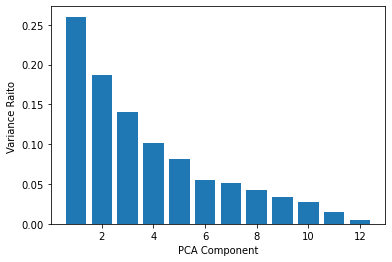

In [33]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.xlabel('PCA Component')
plt.ylabel('Variance Raito ')

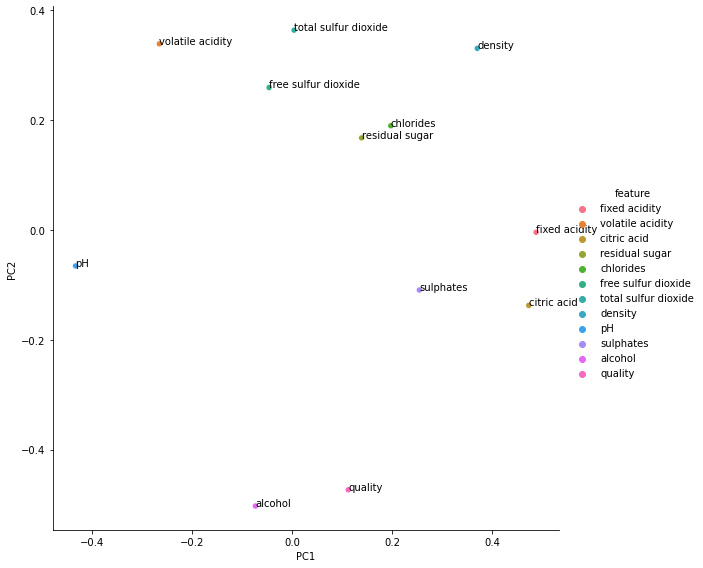

In [25]:
sns.pairplot(data=table,x_vars=['PC1'],y_vars=['PC2'],hue='feature',height=8)

for i,txt in enumerate(table['feature']):
    plt.annotate(txt,(table['PC1'][i],table['PC2'][i]))

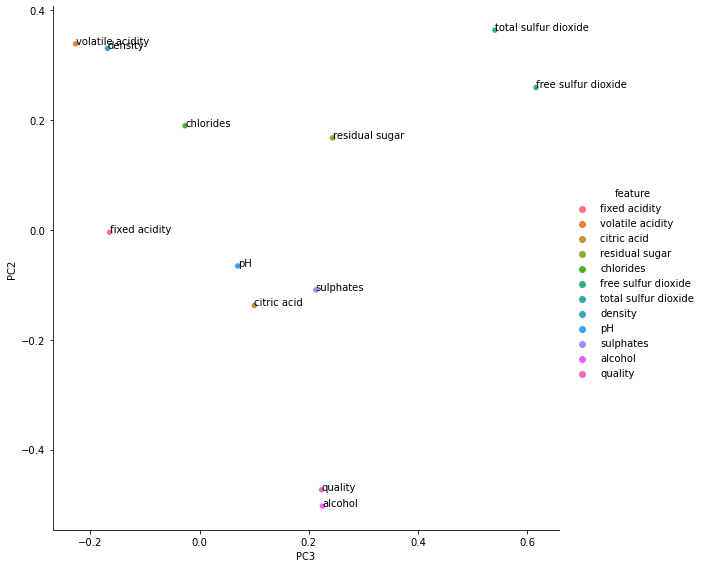

In [26]:
sns.pairplot(data=table,x_vars=['PC3'],y_vars=['PC2'],hue='feature',height=8)

for i,txt in enumerate(table['feature']):
    plt.annotate(txt,(table['PC3'][i],table['PC2'][i]))

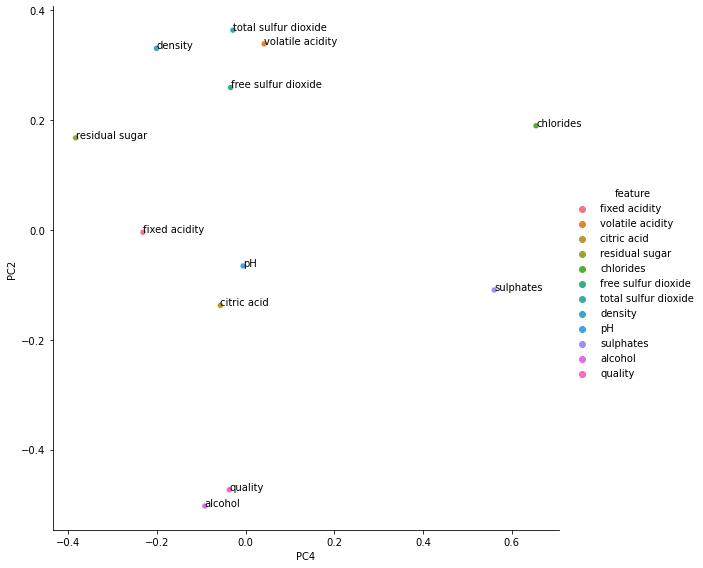

In [29]:
sns.pairplot(data=table,x_vars=['PC4'],y_vars=['PC2'],hue='feature',height=8)

for i,txt in enumerate(table['feature']):
    plt.annotate(txt,(table['PC4'][i],table['PC2'][i]))

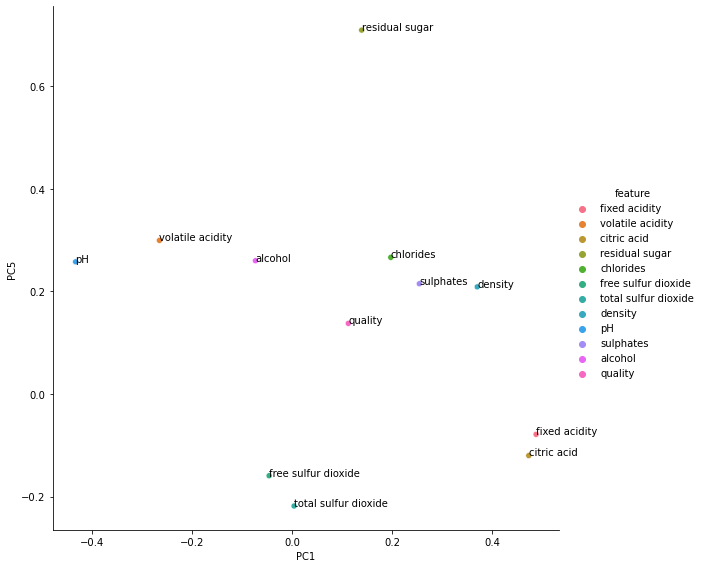

In [32]:
sns.pairplot(data=table,x_vars=['PC1'],y_vars=['PC5'],hue='feature',height=8)

for i,txt in enumerate(table['feature']):
    plt.annotate(txt,(table['PC1'][i],table['PC5'][i]))

In [36]:
final_pca= PCA(n_components=5)
finaldf= final_pca.fit_transform(df_scaled)
finaldf[:5]

array([[-1.77944158,  1.15730315, -1.38658056, -0.04494414,  0.23388451],
       [-1.00418467,  2.07183784,  0.00775877,  0.46611937,  0.18245388],
       [-0.91578319,  1.3934342 , -0.69928641,  0.34529231,  0.0952097 ],
       [ 2.40407712, -0.21379157,  0.06638074, -0.88918202, -1.52474203],
       [-1.77944158,  1.15730315, -1.38658056, -0.04494414,  0.23388451]])

In [38]:
final_df= pd.DataFrame(finaldf,columns=['PC1','PC2','PC3','PC4','PC5'])
final_df

,PC1,PC2,PC3,PC4,PC5
0,-1.779442,1.157303,-1.386581,-0.044944,0.233885
1,-1.004185,2.071838,0.007759,0.466119,0.182454
2,-0.915783,1.393434,-0.699286,0.345292,0.095210
3,2.404077,-0.213792,0.066381,-0.889182,-1.524742
4,-1.779442,1.157303,-1.386581,-0.044944,0.233885
...,...,...,...,...,...
1594,-2.241991,0.599594,0.795827,0.441059,-0.312981
1595,-2.122456,-0.370101,2.138539,0.454564,0.104124
1596,-1.366265,-0.517561,1.250696,0.514505,0.195916
1597,-2.367147,0.703545,0.899482,0.661956,0.021380


<AxesSubplot:>

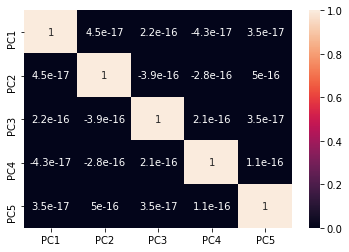

In [39]:
sns.heatmap(final_df.corr(),annot=True)